# Install

In [74]:
%pip install --upgrade --force-reinstall tensorflow tf2onnx matplotlib numpy opencv-python scipy mediapipe pandas tqdm scikit-learn 


  Using cached tensorflow-2.20.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.5 kB)
  Using cached tf2onnx-1.16.1-py3-none-any.whl.metadata (1.3 kB)
  Using cached matplotlib-3.10.7-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached numpy-2.3.3-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-macosx_13_0_arm64.whl.metadata (19 kB)
  Using cached scipy-1.16.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached mediapipe-0.10.21-cp312-cp312-macosx_11_0_universal2.whl.metadata (9.9 kB)
  Using cached pandas-2.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached goo

In [79]:
!{sys.executable} -m pip install scikit-learn


  Using cached scikit_learn-1.7.2-cp312-cp312-macosx_12_0_arm64.whl.metadata (11 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 959.4 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip3 install --upgrade pip


# import and constant

In [81]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
import string
import os
import shutil
import os
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import joblib

In [13]:
dataset_dir = './dataset'
model_name = 'sign_classifier'

# Dataset

In [ ]:
!curl -L -o ./alfabet-bisindo.zip\
  https://www.kaggle.com/api/v1/datasets/download/achmadnoer/alfabet-bisindo

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  114M  100  114M    0     0  1054k      0  0:01:51  0:01:51 --:--:-- 1683k0  1019k      0  0:01:55  0:00:52  0:01:03  585k6 1321k:01:45  0:00:09 1371k3k      0  0:01:51  0:01:50  0:00:01 1648k


In [ ]:
!unzip ./alfabet-bisindo.zip -d .

Archive:  ./alfabet-bisindo.zip
  inflating: ./Citra BISINDO/A/body dot (1).jpg  
  inflating: ./Citra BISINDO/A/body dot (2).jpg  
  inflating: ./Citra BISINDO/A/body dot (3).jpg  
  inflating: ./Citra BISINDO/A/body dot (4).jpg  
  inflating: ./Citra BISINDO/A/body white (1).jpg  
  inflating: ./Citra BISINDO/A/body white (2).jpg  
  inflating: ./Citra BISINDO/A/body white (3).jpg  
  inflating: ./Citra BISINDO/A/body white (4).jpg  
  inflating: ./Citra BISINDO/A/wall white (1).jpg  
  inflating: ./Citra BISINDO/A/wall white (2).jpg  
  inflating: ./Citra BISINDO/A/wall white (3).jpg  
  inflating: ./Citra BISINDO/A/wall white (4).jpg  
  inflating: ./Citra BISINDO/B/body dot (1).jpg  
  inflating: ./Citra BISINDO/B/body dot (2).jpg  
  inflating: ./Citra BISINDO/B/body dot (3).jpg  
  inflating: ./Citra BISINDO/B/body dot (4).jpg  
  inflating: ./Citra BISINDO/B/body white (1).jpg  
  inflating: ./Citra BISINDO/B/body white (2).jpg  
  inflating: ./Citra BISINDO/B/body white (3).jp

In [ ]:
!mv "Citra BISINDO" ./dataset

In [ ]:
!curl -L -o ./indonesian-sign-language-bisindo.zip\
  https://www.kaggle.com/api/v1/datasets/download/agungmrf/indonesian-sign-language-bisindo

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1396M  100 1396M    0     0  6025k      0  0:03:57  0:03:57 --:--:-- 2015k     0  3615k      0  0:06:35  0:00:12  0:06:23 4137k970k  5393k      0  0:04:25  0:00:40  0:03:45 8505k  0  0:04:01  0:00:54  0:03:07 7723k 0  0:04:50  0:01:29  0:03:21 6205k03k      0  0:04:06  0:02:18  0:01:48 9658k     0  0:03:49  0:02:49  0:01:00 9756k0:20 9046k0k      0  0:03:34  0:03:17  0:00:17 8841k34  0:03:18  0:00:16 7907k  0:00:03 7699k  0  0:03:54  0:03:52  0:00:02  525k


In [ ]:
def merge_dataset(src_folder):
    """
    Move files from src_folder into dataset, preserving subfolder (label) structure.
    Example: src_folder/cat -> dataset/cat
             src_folder/dog -> dataset/dog
    """
    # Ensure destination exists
    os.makedirs(dataset_dir, exist_ok=True)

    # Iterate over all label folders in the source
    for label in os.listdir(src_folder):
        label_path_src = os.path.join(src_folder, label)
        label_path_dest = os.path.join(dataset_dir, label)

        # Skip if not a folder
        if not os.path.isdir(label_path_src):
            continue

        # Create label folder in destination if needed
        os.makedirs(label_path_dest, exist_ok=True)

        # Move all files from src → dest
        for filename in os.listdir(label_path_src):
            src = os.path.join(label_path_src, filename)
            dst = os.path.join(label_path_dest, filename)

            # Avoid overwriting files with same name
            if os.path.exists(dst):
                base, ext = os.path.splitext(filename)
                dst = os.path.join(label_path_dest, f"{base}_2{ext}")

            shutil.move(src, dst)

    print(f"✅ Merged '{src_folder}' into '{dataset_dir}' successfully!")

In [ ]:
!unzip indonesian-sign-language-bisindo.zip

Archive:  indonesian-sign-language-bisindo.zip
  inflating: bisindo/images/train/A/IMG_20191210_180125.jpg  
  inflating: bisindo/images/train/A/IMG_20191210_180205.jpg  
  inflating: bisindo/images/train/A/IMG_20191210_180224.jpg  
  inflating: bisindo/images/train/A/augmented_image_1.jpg  
  inflating: bisindo/images/train/A/augmented_image_10.jpg  
  inflating: bisindo/images/train/A/augmented_image_100.jpg  
  inflating: bisindo/images/train/A/augmented_image_11.jpg  
  inflating: bisindo/images/train/A/augmented_image_12.jpg  
  inflating: bisindo/images/train/A/augmented_image_13.jpg  
  inflating: bisindo/images/train/A/augmented_image_14.jpg  
  inflating: bisindo/images/train/A/augmented_image_16.jpg  
  inflating: bisindo/images/train/A/augmented_image_17.jpg  
  inflating: bisindo/images/train/A/augmented_image_20.jpg  
  inflating: bisindo/images/train/A/augmented_image_21.jpg  
  inflating: bisindo/images/train/A/augmented_image_22.jpg  
  inflating: bisindo/images/train/A

In [ ]:
merge_dataset('./bisindo/images/train')

✅ Merged './bisindo/images/train' into './dataset' successfully!


In [ ]:
merge_dataset('./bisindo/images/val')

✅ Merged './bisindo/images/val' into './dataset' successfully!


In [ ]:
!rm -rf ./bisindo

In [1]:
!curl -L -o ./bisindo-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/yunitayupratiwi/bisindo-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 24.1M  100 24.1M    0     0   136k      0  0:03:00  0:03:00 --:--:--  307k 0   353k      0  0:01:09  0:00:09  0:01:00  274k2k      0  0:04:00  0:01:36  0:02:24 1185473k    0     0  87280      0  0:04:49  0:01:55  0:02:54     0  0  89762      0  0:04:41  0:01:58  0:02:43  109k9k      0  0:03:26  0:02:33  0:00:53  438k   0  0:03:13  0:02:46  0:00:27  261k 0     0   129k      0  0:03:11  0:02:49  0:00:22  248k


In [2]:
!unzip bisindo-dataset.zip

Archive:  bisindo-dataset.zip
  inflating: BISINDO - Dataset/test/A.212f180c-c1e2-11eb-b524-0008ca6b6d30.jpg  
  inflating: BISINDO - Dataset/test/A.212f180c-c1e2-11eb-b524-0008ca6b6d30.xml  
  inflating: BISINDO - Dataset/test/A.643e4029-c1e4-11eb-9fc1-0008ca6b6d30.jpg  
  inflating: BISINDO - Dataset/test/A.643e4029-c1e4-11eb-9fc1-0008ca6b6d30.xml  
  inflating: BISINDO - Dataset/test/A.66ae97e2-c1e4-11eb-83d3-0008ca6b6d30.jpg  
  inflating: BISINDO - Dataset/test/A.66ae97e2-c1e4-11eb-83d3-0008ca6b6d30.xml  
  inflating: BISINDO - Dataset/test/A.67eaadd9-c1e4-11eb-bac0-0008ca6b6d30.jpg  
  inflating: BISINDO - Dataset/test/A.67eaadd9-c1e4-11eb-bac0-0008ca6b6d30.xml  
  inflating: BISINDO - Dataset/test/A.6923fe1e-c1e4-11eb-90c4-0008ca6b6d30.jpg  
  inflating: BISINDO - Dataset/test/A.6923fe1e-c1e4-11eb-90c4-0008ca6b6d30.xml  
  inflating: BISINDO - Dataset/test/B.002d8fdf-c1e3-11eb-952a-0008ca6b6d30.jpg  
  inflating: BISINDO - Dataset/test/B.002d8fdf-c1e3-11eb-952a-0008ca6b6d30.xml 

In [6]:
def construct_dataset(src_folder):
    """
    Move files from src_folder into dataset, based on the first letter of the filename.
    Example: src_folder/A.66ae97e2-c1e4-11eb-83d3-0008ca6b6d30.jpg -> dataset/A
             src_folder/B.002d8fdf-c1e3-11eb-952a-0008ca6b6d30.jpg -> dataset/B
    """
    # Ensure destination exists
    os.makedirs(dataset_dir, exist_ok=True)

    # Iterate over all file folders in the source
    for filename in os.listdir(src_folder):
        src_file = os.path.join(src_folder, filename)

        # Skip if a folder
        if os.path.isdir(src_file):
            continue
        
        # Skip if not a jpg
        if not src_file.lower().endswith('.jpg'):
            continue
        
        label = filename[0].upper()  # First character as label
        dest = os.path.join(dataset_dir, label)
        # Create label folder in destination if needed
        os.makedirs(dest, exist_ok=True)

        dst_file = os.path.join(dest, filename)

        # Avoid overwriting files with same name
        if os.path.exists(dst_file):
            base, ext = os.path.splitext(filename)
            dst_file = os.path.join(dest, f"{base}_3{ext}")

        shutil.move(src_file, dst_file)

    print(f"successfully!")

In [9]:
construct_dataset("./BISINDO - Dataset/test")

successfully!


In [10]:
construct_dataset("./BISINDO - Dataset/train")

successfully!


In [11]:
!rm -rf "BISINDO - Dataset"

In [82]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2)  # dua tangan
mp_drawing = mp.solutions.drawing_utils

I0000 00:00:1760542601.098126   52980 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1 Pro


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1760542601.117994  202073 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760542601.124948  202073 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [84]:
def extract_hand_landmarks(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return None
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    result = hands.process(image_rgb)
    
    if not result.multi_hand_landmarks:
        return None
    
    # List semua tangan yang terdeteksi
    coords_all = []
    for landmarks in result.multi_hand_landmarks:
        coords = []
        for lm in landmarks.landmark:
            coords.extend([lm.x, lm.y, lm.z])
        coords_all.append(coords)
    
    # Jika hanya 1 tangan, tambahkan 0 agar panjang fitur tetap konsisten
    if len(coords_all) == 1:
        coords_all.append([0.0]*63)  # tangan kosong
    
    # Flatten dua tangan (kanan + kiri)
    features = np.array(coords_all[0] + coords_all[1])
    return features

In [106]:
data = []
labels = []

for label in sorted(os.listdir(dataset_dir)):
    label_path = os.path.join(dataset_dir, label)
    if not os.path.isdir(label_path):
        continue

    print(f'Processing label: {label}')
    for img_name in tqdm(os.listdir(label_path)):
        img_path = os.path.join(label_path, img_name)
        landmarks = extract_hand_landmarks(img_path)
        if landmarks is not None:
            data.append(landmarks)
            labels.append(label)

Processing label: A


100%|██████████| 465/465 [00:14<00:00, 32.01it/s]


Processing label: B


100%|██████████| 466/466 [00:13<00:00, 33.67it/s]


Processing label: C


100%|██████████| 456/456 [00:12<00:00, 37.93it/s]


Processing label: D


100%|██████████| 462/462 [00:16<00:00, 28.43it/s]


Processing label: E


100%|██████████| 468/468 [00:12<00:00, 36.71it/s]


Processing label: F


100%|██████████| 474/474 [00:13<00:00, 34.12it/s]


Processing label: G


100%|██████████| 477/477 [00:16<00:00, 29.68it/s]


Processing label: H


100%|██████████| 462/462 [00:15<00:00, 29.56it/s]


Processing label: I


100%|██████████| 477/477 [00:13<00:00, 35.69it/s]


Processing label: J


100%|██████████| 477/477 [00:13<00:00, 36.18it/s]


Processing label: K


100%|██████████| 462/462 [00:15<00:00, 29.43it/s]


Processing label: L


100%|██████████| 474/474 [00:12<00:00, 37.68it/s]


Processing label: M


100%|██████████| 471/471 [00:16<00:00, 28.88it/s]


Processing label: N


100%|██████████| 465/465 [00:14<00:00, 31.77it/s]


Processing label: O


100%|██████████| 474/474 [00:12<00:00, 36.93it/s]


Processing label: P


100%|██████████| 474/474 [00:15<00:00, 31.17it/s]


Processing label: Q


100%|██████████| 462/462 [00:16<00:00, 28.33it/s]


Processing label: R


100%|██████████| 465/465 [00:12<00:00, 35.86it/s]


Processing label: S


100%|██████████| 456/456 [00:16<00:00, 28.26it/s]


Processing label: T


100%|██████████| 477/477 [00:16<00:00, 29.27it/s]


Processing label: U


100%|██████████| 471/471 [00:12<00:00, 37.17it/s]


Processing label: V


100%|██████████| 474/474 [00:13<00:00, 36.45it/s]


Processing label: W


100%|██████████| 477/477 [00:15<00:00, 30.53it/s]


Processing label: X


100%|██████████| 471/471 [00:16<00:00, 28.02it/s]


Processing label: Y


100%|██████████| 438/438 [00:12<00:00, 34.11it/s]


Processing label: Z


100%|██████████| 477/477 [00:12<00:00, 37.89it/s]


In [107]:
# Ubah list menjadi DataFrame
df = pd.DataFrame(data)
df['label'] = labels

# Simpan ke CSV
df.to_csv("hand_keypoints.csv", index=False)

print("✅ Data dan label berhasil disimpan ke hand_keypoints.csv")

✅ Data dan label berhasil disimpan ke hand_keypoints.csv


# Train

In [108]:
df = pd.read_csv("hand_keypoints.csv")
print(f"Total data: {len(df)}")
print(df.head())


Total data: 9756
          0         1             2         3         4         5         6  \
0  0.113166  0.822599  5.401650e-07  0.195477  0.813338 -0.077608  0.288585   
1  0.072315  0.750385  4.864663e-07  0.171043  0.754554 -0.077005  0.277623   
2  0.114166  0.791155 -3.131314e-08  0.155205  0.775459 -0.035345  0.209606   
3  0.757478  0.549036 -2.165960e-07  0.679337  0.564998 -0.018379  0.606947   
4  0.718816  0.429549 -1.140924e-07  0.672385  0.437019 -0.020921  0.599781   

          7         8         9  ...       117       118       119       120  \
0  0.775300 -0.115059  0.381177  ...  0.871711  0.542666 -0.079876  0.875374   
1  0.734710 -0.111966  0.385013  ...  0.899605  0.648649 -0.107626  0.887502   
2  0.740575 -0.053146  0.261552  ...  0.451656  0.736039 -0.074687  0.466103   
3  0.546419 -0.040267  0.556414  ...  0.318229  0.503575 -0.194958  0.303473   
4  0.394989 -0.038702  0.541812  ...  0.312410  0.353749 -0.133061  0.325894   

        121       122      

In [109]:
le = LabelEncoder()
y = le.fit_transform(df['label'])
X = df.drop('label', axis=1).values

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [111]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [112]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 256)            │        32,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,762 (268.60 KB)

 Trainable params: 68,762 (268.60 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=1000, batch_size=32)

Epoch 1/1000
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1788 - loss: 2.7283 - val_accuracy: 0.4452 - val_loss: 2.1028
Epoch 2/1000
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4132 - loss: 1.9445 - val_accuracy: 0.6025 - val_loss: 1.5127
Epoch 3/1000
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5410 - loss: 1.5113 - val_accuracy: 0.6378 - val_loss: 1.2260
Epoch 4/1000
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6114 - loss: 1.2646 - val_accuracy: 0.7351 - val_loss: 0.9604
Epoch 5/1000
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6611 - loss: 1.0878 - val_accuracy: 0.7597 - val_loss: 0.8181
Epoch 6/1000
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7028 - loss: 0.9669 - val_accuracy: 0.7531 - val_loss: 0.7417
Epoch 7/1000
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7303 - loss: 0.8725 - val_accuracy: 0.7946 - val_loss: 0.6382
Epoch 8/1000
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7455 - loss: 0.8061 - 

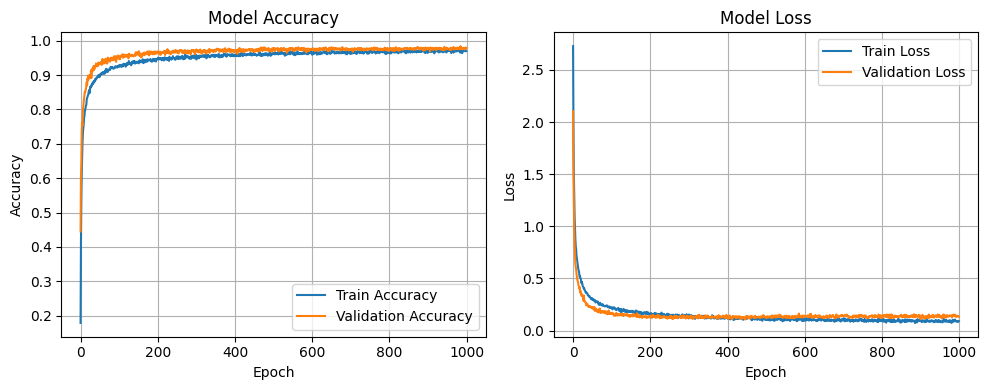

In [114]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# save model

In [115]:
import pickle

model.save(f"{model_name}.keras")
with open(f"{model_name}_label.pkl", "wb") as f:
    pickle.dump(le, f)

In [116]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the .tflite file
with open(f"{model_name}.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: /var/folders/w3/12vhw4l144v3jqftz9jdh2cc0000gn/T/tmpzh45pk8s/assets


INFO:tensorflow:Assets written to: /var/folders/w3/12vhw4l144v3jqftz9jdh2cc0000gn/T/tmpzh45pk8s/assets


Saved artifact at '/var/folders/w3/12vhw4l144v3jqftz9jdh2cc0000gn/T/tmpzh45pk8s'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 126), dtype=tf.float32, name='keras_tensor_167')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  13351857104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13351857296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13351857872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13352473552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13352470672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13352471056: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1760547435.769765   52980 tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
W0000 00:00:1760547435.769939   52980 tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-10-15 23:57:15.770372: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/w3/12vhw4l144v3jqftz9jdh2cc0000gn/T/tmpzh45pk8s
2025-10-15 23:57:15.770803: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-10-15 23:57:15.770808: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/w3/12vhw4l144v3jqftz9jdh2cc0000gn/T/tmpzh45pk8s
2025-10-15 23:57:15.774659: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-10-15 23:57:15.792171: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/w3/12vhw4l144v3jqftz9jdh2cc0000gn/T/tmpzh45pk8s
2025-10-15 23:57:15.797147: I tensorflow/cc/saved_model/loader.cc: